# Arm Motion Modeling

## System Description

A double-pendulum system hanging in gravity is shown in the figure above. $q=[\theta_1, \theta_2]$ are the system configuration variables. We assume the z-axis is pointing out from the screen/paper, thus the positive direction of rotation is counter-clockwise.
The solution steps are:
1. Computing the Lagrangian of the system. 
2. Computing the Euler-Lagrange equations, and solve them for $\ddot{\theta}_1$ and $\ddot{\theta}_2$.
3. Numerically evaluating the solutions for ${\tau}_1$ and ${\tau}_2$, and simulating the system for ${\theta}_1$, ${\theta}_2$, $\dot{\theta}_1$, $\dot{\theta}_2$, $\ddot{\theta}_1$ and $\ddot{\theta}_2$.
4. Animating the simulation.

In [6]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='./double-pendulum-diagram.png' width=450' height='300'></table>"))

## Import Libraries and Define System Constants

Import libraries:

In [7]:
# Imports required for data processing
import os
import csv

# Imports required for dynamics calculations
import sympy
from sympy.abc import t
from sympy import symbols, Eq, Function, solve, sin, cos, Matrix, Subs, substitution, Derivative, simplify, symbols, lambdify
import math
from math import pi
import numpy as np
import matplotlib.pyplot as plt

# Imports required for animation
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import plotly.graph_objects as go


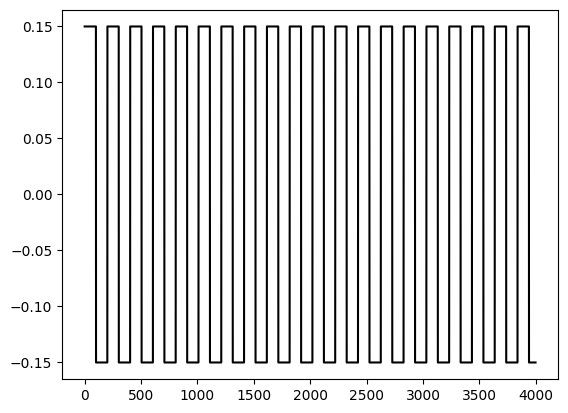

In [9]:
# Does not work with run all, will be cut off short while generating trajectory
# Parameters
size = 3998 # how many data points in ms
frame_rate = 100 
wave_length = 100 # frequency
high = 0.15 # amplitude of the step function
low = -high

trigger = True
counter = 0
step_function = []
t = []
for i in range(size):
    if trigger:
        step_function.append(high)
        counter+=1
        if counter > wave_length:
            counter = 0
            trigger = False
    else:
        step_function.append(low)
        counter+=1
        if counter > wave_length:
            counter = 0
            trigger = True
    t.append(i)

plt.figure()
plt.plot(step_function, 'k-')  


with open("src/data_profile_step.c", "w") as data_file:
    data_file.write('#include "data_profile.h"\n\n')
    data_file.write('float Angle_Profile_STEP[DATA_SAMPLES] = {\n')
    list_str = ', \n'.join(map(str, step_function))  
    data_file.write(list_str)
    data_file.write('\n};\n')
    
    data_file.write('float Accel_Profile_STEP[DATA_SAMPLES-2] = {\n')
    accel_list_str = ', \n'.join(map(str, step_function[:-2])) 
    data_file.write(accel_list_str)
    data_file.write('\n};')